<a href="https://colab.research.google.com/github/AhmedAtya74/Machine-Learning-Algorithms/blob/main/Linear_Regression_With_Multivariables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Import All Libraries




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [ ]:
path = '/content/sample_data/house_data.csv'
all_data = pd.read_csv(path)

### Data Spliting 

#### Training Data

In [ ]:
training_data = all_data.loc[0:15000, ['grade', 'bathrooms', 'lat', 'sqft_living', 'view', 'price']]
training_data.head()

,grade,bathrooms,lat,sqft_living,view,price
0,7,1.00,47.5112,1180,0,221900.0
1,7,2.25,47.7210,2570,0,538000.0
2,6,1.00,47.7379,770,0,180000.0
3,7,3.00,47.5208,1960,0,604000.0
4,8,2.00,47.6168,1680,0,510000.0


#### Testing Data

In [ ]:
testing_data = all_data.loc[15000:, ['grade', 'bathrooms', 'lat', 'sqft_living', 'view', 'price']]
testing_data.head()

,grade,bathrooms,lat,sqft_living,view,price
15000,6,1.0,47.5155,710,0,289000.0
15001,9,2.5,47.6359,2970,0,525000.0
15002,9,2.5,47.6359,2970,0,745000.0
15003,7,1.0,47.7001,1000,2,397000.0
15004,7,1.0,47.5380,1980,0,233000.0


### Explore The Data

In [ ]:
training_data.describe()

,grade,bathrooms,lat,sqft_living,view,price
count,15001.000000,15001.000000,15001.000000,15001.000000,15001.000000,1.500100e+04
mean,7.591161,2.059146,47.559936,2050.199920,0.238517,5.324029e+05
std,1.165893,0.758912,0.139708,906.074572,0.772122,3.664820e+05
min,3.000000,0.000000,47.155900,380.000000,0.000000,7.500000e+04
25%,7.000000,1.500000,47.465100,1410.000000,0.000000,3.150000e+05
50%,7.000000,2.000000,47.573000,1890.000000,0.000000,4.470000e+05
75%,8.000000,2.500000,47.678900,2500.000000,0.000000,6.370000e+05
max,13.000000,8.000000,47.777600,13540.000000,4.000000,7.700000e+06


In [ ]:
testing_data.describe()

,grade,bathrooms,lat,sqft_living,view,price
count,6613.000000,6613.000000,6613.000000,6613.000000,6613.000000,6.613000e+03
mean,7.805686,2.240738,47.560311,2147.063965,0.224709,5.574835e+05
std,1.183632,0.780691,0.135933,942.597489,0.752901,3.680069e+05
min,1.000000,0.000000,47.159300,290.000000,0.000000,7.800000e+04
25%,7.000000,1.750000,47.482000,1450.000000,0.000000,3.350000e+05
50%,8.000000,2.500000,47.568600,1960.000000,0.000000,4.640000e+05
75%,8.000000,2.500000,47.676000,2670.000000,0.000000,6.570000e+05
max,13.000000,6.500000,47.777600,8020.000000,4.000000,3.800000e+06


#### Data Visualiation

##### Visualize Grade vs Price

Text(0.5, 1.0, 'Grade vs Price')

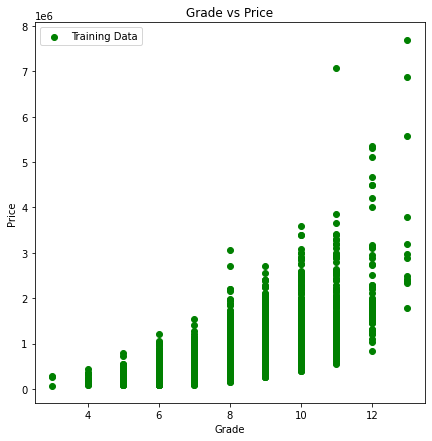

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(training_data['grade'], training_data['price'], c='green', label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Grade')
ax.set_ylabel('Price')
ax.set_title('Grade vs Price')


##### Visualize Bathrooms vs Price

Text(0.5, 1.0, 'Bathrooms vs Price')

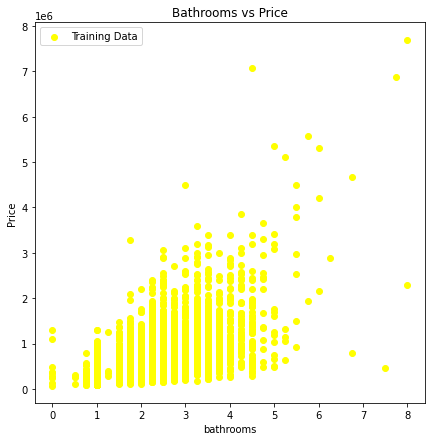

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(training_data['bathrooms'], training_data['price'], c='yellow', label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('bathrooms')
ax.set_ylabel('Price')
ax.set_title('Bathrooms vs Price')

##### Visualize Lat vs Price

Text(0.5, 1.0, 'Lat vs Price')

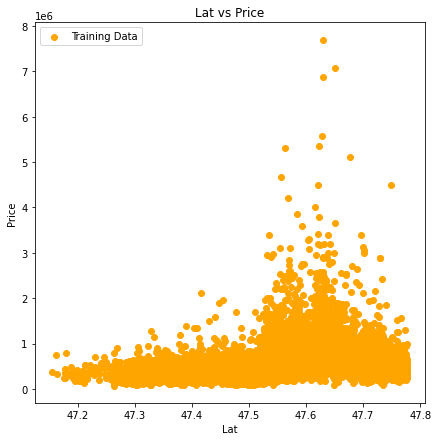

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(training_data['lat'], training_data['price'], c='orange', label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Lat')
ax.set_ylabel('Price')
ax.set_title('Lat vs Price')

##### Visualize Sqft_living vs Price

Text(0.5, 1.0, 'Sqft_living vs Price')

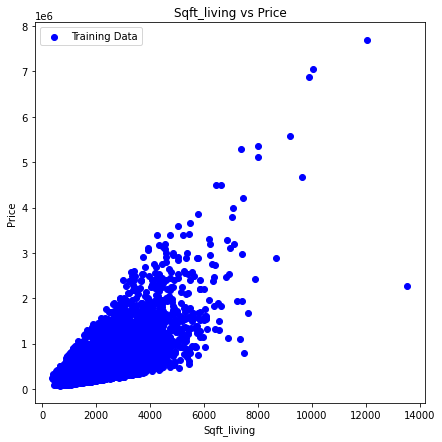

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(training_data['sqft_living'], training_data['price'], c='blue', label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Sqft_living')
ax.set_ylabel('Price')
ax.set_title('Sqft_living vs Price')

##### Visualize View vs Price

Text(0.5, 1.0, 'View vs Price')

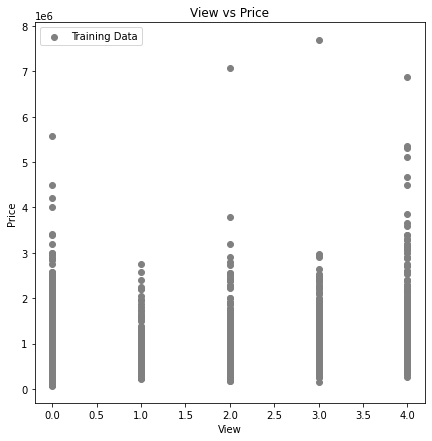

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(training_data['view'], training_data['price'], c='Grey', label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('View')
ax.set_ylabel('Price')
ax.set_title('View vs Price')

### Extract input Variables / Features

In [ ]:
X_train = training_data.loc[:, ['grade', 'bathrooms', 'lat', 'sqft_living', 'view']]

### Features Scaling 

In [ ]:
X_train = (X_train - X_train.mean()) / X_train.std()

### Data After Scaling

In [ ]:
X_train.head()

,grade,bathrooms,lat,sqft_living,view
0,-0.507045,-1.395611,-0.348840,-0.960407,-0.308912
1,-0.507045,0.251484,1.152863,0.573684,-0.308912
2,-1.364757,-1.395611,1.273829,-1.412908,-0.308912
3,-0.507045,1.239741,-0.280125,-0.099550,-0.308912
4,0.350666,-0.077935,0.407022,-0.408576,-0.308912


### Add X0 value

In [ ]:
X_train.insert(0, 'X0', 1)
X_train.head()

,X0,grade,bathrooms,lat,sqft_living,view
0,1,-0.507045,-1.395611,-0.348840,-0.960407,-0.308912
1,1,-0.507045,0.251484,1.152863,0.573684,-0.308912
2,1,-1.364757,-1.395611,1.273829,-1.412908,-0.308912
3,1,-0.507045,1.239741,-0.280125,-0.099550,-0.308912
4,1,0.350666,-0.077935,0.407022,-0.408576,-0.308912


### Extract Target Variable 

In [ ]:
y_train = training_data.loc[:,['price']]
y_train.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


### Build Model

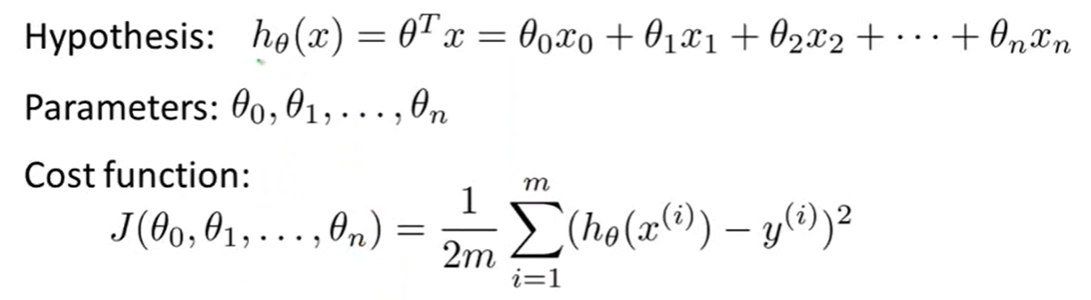

#### Convert Data Into Matrices && Set Parameters

In [ ]:
X_train = np.matrix(X_train.values)
y_train = np.matrix(y_train.values)
theta = np.matrix(np.array([0, 0, 0, 0, 0, 0]))

#### Cost Function

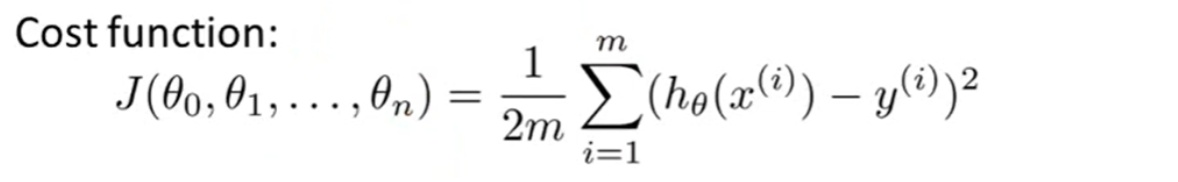

In [ ]:
def compute_cost(X, y, theta):
    partial = np.power(((X * theta.T) - y), 2)
    return np.sum(partial) / (2 * len(X))

#### Gradient Descent Function 

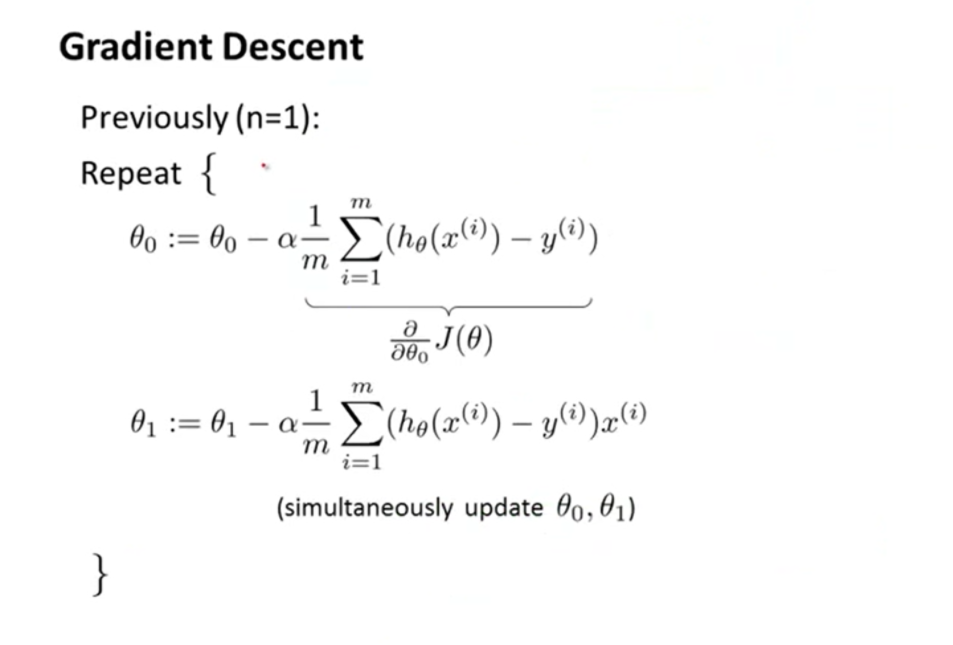

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    temp = np.matrix(np.zeros(theta.shape))
    para = theta.shape[1]
    cost = np.zeros(iterations)

    for i in range(iterations):
        error = (X * theta.T) - y
        for j in range(para):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - (alpha / len(X)) * np.sum(term)

        theta = temp
        cost[i] = compute_cost(X, y, theta)
    return theta, cost

### Training Model

#### Initialize Learning Rate & Number Of Iterations

---





In [ ]:
alpha = 0.001
iters = 1000

In [ ]:
best_theta, cost = gradient_descent(X_train, y_train, theta, alpha, iters)
print('Theta(θ) --> \n', best_theta)
print('\n\n Cost In Every Iteration --> \n', cost)
print('\n\n\n Least Cost in Training Phase ===> ', compute_cost(X_train, y_train, best_theta))

Theta(θ) --> 
 [[336640.79067745  88622.51471764  50915.89606814  62142.72907149
   99219.59925534  61291.44185083]]


 Cost In Every Iteration --> 
 [2.08398792e+11 2.07922651e+11 2.07448043e+11 2.06974962e+11
 2.06503402e+11 2.06033356e+11 2.05564818e+11 2.05097783e+11
 2.04632245e+11 2.04168198e+11 2.03705635e+11 2.03244551e+11
 2.02784941e+11 2.02326798e+11 2.01870117e+11 2.01414891e+11
 2.00961116e+11 2.00508785e+11 2.00057893e+11 1.99608434e+11
 1.99160403e+11 1.98713793e+11 1.98268600e+11 1.97824817e+11
 1.97382440e+11 1.96941463e+11 1.96501880e+11 1.96063686e+11
 1.95626875e+11 1.95191442e+11 1.94757382e+11 1.94324690e+11
 1.93893359e+11 1.93463385e+11 1.93034762e+11 1.92607486e+11
 1.92181551e+11 1.91756951e+11 1.91333682e+11 1.90911738e+11
 1.90491115e+11 1.90071807e+11 1.89653808e+11 1.89237115e+11
 1.88821722e+11 1.88407624e+11 1.87994816e+11 1.87583292e+11
 1.87173049e+11 1.86764081e+11 1.86356383e+11 1.85949950e+11
 1.85544778e+11 1.85140861e+11 1.84738195e+11 1.84336775e

#### Error vs Training Epoch 

Text(0.5, 1.0, 'Error vs Training Epoch')

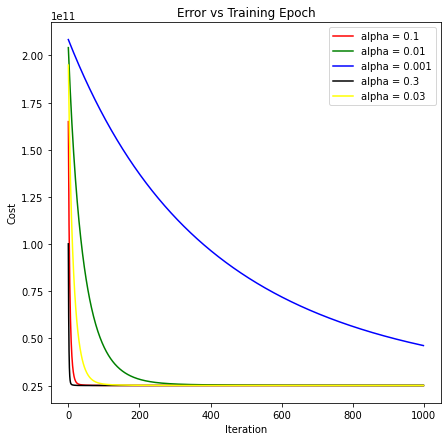

In [ ]:
fig, ax = plt.subplots(figsize = (7, 7))
learning_rate = [0.1,0.01,0.001, 0.3, 0.03]
colors = ['red', 'green', 'blue', 'black', 'yellow']
for i in range(len(learning_rate)):
  best_theta, cost = gradient_descent(X_train, y_train, theta, learning_rate[i], iters)
  ax.plot(np.arange(iters), cost, colors[i], label="alpha = "+str(learning_rate[i]))

ax.legend(loc=1)
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training Epoch')

### Training Model

In [ ]:
X_test = testing_data.loc[:, ['grade', 'bathrooms', 'lat', 'sqft_living', 'view']]
X_test = (X_test - X_test.mean()) / X_test.std()
X_test.insert(0, 'X0', 1)
X_test.head()

,X0,grade,bathrooms,lat,sqft_living,view
15000,1,-1.525547,-1.589282,-0.329654,-1.524579,-0.298457
15001,1,1.009025,0.332093,0.556079,0.873051,-0.298457
15002,1,1.009025,0.332093,0.556079,0.873051,-0.298457
15003,1,-0.680690,-1.589282,1.028372,-1.216918,2.357933
15004,1,-0.680690,-1.589282,-0.164131,-0.177238,-0.298457


In [ ]:
y_test = testing_data.loc[:, ['price']]
y_test.head()

,price
15000,289000.0
15001,525000.0
15002,745000.0
15003,397000.0
15004,233000.0


In [ ]:
X_test = np.matrix(X_test.values)
y_test = np.matrix(y_test.values)

In [ ]:
print('\n\n\n Least Cost in Testing Phase ===> ', compute_cost(X_test, y_test, best_theta))




 Least Cost in Testing Phase ===>  23536569968.794563


#### Prediction Function

In [ ]:
def Predict_price(X,theta):
  predicted_price = np.dot(X,theta.T)
  return predicted_price

In [ ]:
print("Hypothsis Price: \n\n", Predict_price(X_test, best_theta))

print("\n\n\n\n Actual Price: \n\n", y_test)

Hypothsis Price: 

 [[105264.59779188]
 [798850.2259153 ]
 [798850.2259153 ]
 ...
 [298360.97370003]
 [400362.55117731]
 [298159.89875896]]




 Actual Price: 

 [[289000.]
 [525000.]
 [745000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
